In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
df = pd.read_csv(r"C:\Users\SURAJ\OneDrive\Documents\files\pokemon_new.csv")
print(df.head())
print(df.tail())

   HP  Attack  Defense  Sp. Atk  Sp. Def  Speed  Generation
0  45      49       49       65       65     45           1
1  60      62       63       80       80     60           1
2  80      82       83      100      100     80           1
3  80     100      123      122      120     80           1
4  39      52       43       60       50     65           1
      HP  Attack  Defense  Sp. Atk  Sp. Def  Speed  Generation
495   55      75       60       75       60    103           5
496   50      75       45       40       45     60           5
497   70     135      105       60      105     20           5
498   69      55       45       55       55     15           5
499  114      85       70       85       80     30           5


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   HP          500 non-null    int64
 1   Attack      500 non-null    int64
 2   Defense     500 non-null    int64
 3   Sp. Atk     500 non-null    int64
 4   Sp. Def     500 non-null    int64
 5   Speed       500 non-null    int64
 6   Generation  500 non-null    int64
dtypes: int64(7)
memory usage: 27.5 KB


In [4]:
df.Generation.value_counts()

1    100
2    100
3    100
4    100
5    100
Name: Generation, dtype: int64

In [5]:
df.describe()

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000
mean,66.612000,74.372000,68.658000,67.158000,66.478000,64.694000,3.00000
std,24.360302,30.108914,31.279992,29.319418,25.159004,27.932433,1.41563
min,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,50.000000,52.000000,45.000000,45.000000,50.000000,43.750000,2.00000
50%,65.000000,72.000000,64.000000,61.500000,65.000000,65.000000,3.00000
75%,76.250000,93.000000,85.000000,85.000000,80.000000,85.000000,4.00000
max,255.000000,185.000000,230.000000,175.000000,230.000000,160.000000,5.00000


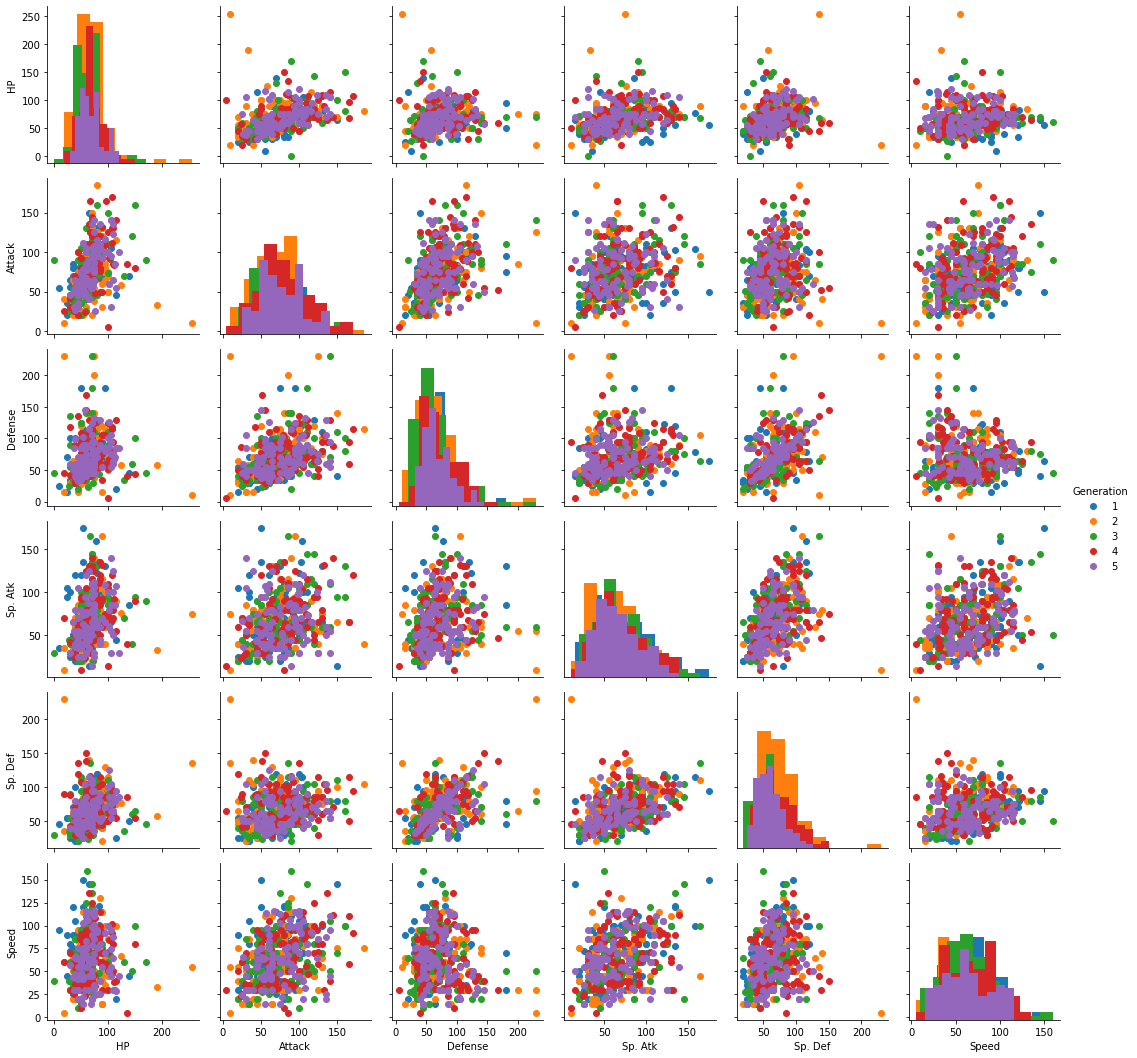

In [6]:
plot = sns.PairGrid(df.iloc[:,0:8], hue="Generation")
plot = plot.map_diag(plt.hist)
plot = plot.map_offdiag(plt.scatter)
plot = plot.add_legend()
plt.show()

In [7]:
# define function for hotelling T^2
def hotelling_t_2(X,Y,p):
    a=X.shape ;b=Y.shape
    nx = a[0]
    ny = b[0]
    delta = np.matrix(X.mean()- Y.mean())
    Sx = np.matrix(X.cov())
    Sy = np.matrix(Y.cov())
    S_pooled = (((nx-1)*Sx + (ny-1)*Sy)/((nx+ny)-2))
    # fot inverse of pooled
    inv_Spooled = np.linalg.inv(S_pooled)
    t_squared = ((nx*ny)/(nx+ny) *delta)*(inv_Spooled*np.transpose(delta))
    statistics = t_squared * ((nx+ny-p-1)/((nx+ny-2)*p))
    from scipy.stats import f
    F = f(p , nx+ny-p-1)
    pvalue = 1- F.cdf(statistics)
    print("Hotelling_T^2" ,t_squared)
    print("Degree of Freedom" , p , "and", (nx+ny-p-1))
    print('p_value', pvalue)

In [8]:
gen1 = df[df.Generation == 1]
gen2 = df[df.Generation == 2]
gen3 = df[df.Generation == 3]
gen4 = df[df.Generation == 4]
gen5 = df[df.Generation == 5]


In [9]:
# comparison of gen1 with gen2
hotelling_t_2(gen1.iloc[:,0:6],gen2.iloc[:,0:6],6)

Hotelling_T^2 [[16.08732956]]
Degree of Freedom 6 and 193
p_value [[0.01853231]]


In [10]:
# comparison of gen2 with gen3
hotelling_t_2(gen2.iloc[:,0:6],gen3.iloc[:,0:6],6)

Hotelling_T^2 [[15.01562988]]
Degree of Freedom 6 and 193
p_value [[0.02693606]]


In [11]:
# comparison of gen3 with gen4
hotelling_t_2(gen3.iloc[:,0:6],gen4.iloc[:,0:6],6)

Hotelling_T^2 [[13.12377635]]
Degree of Freedom 6 and 193
p_value [[0.05144612]]


In [12]:
# comparison of gen4 with gen5
hotelling_t_2(gen4.iloc[:,0:6],gen5.iloc[:,0:6],6)

Hotelling_T^2 [[8.35914531]]
Degree of Freedom 6 and 193
p_value [[0.23353225]]
